In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from tqdm import tqdm
import re

from keras.layers import Dense, Dropout, Activation, LSTM

In [2]:
#Membaca data
data=pd.read_csv('C:/WinPython_64bit/notebooks/shopee code league 2020/shopee-sentiment-analysis_dataset/train.csv')
data.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


Text(0,0.5,'rating')

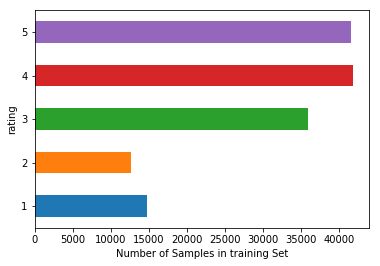

In [54]:
import matplotlib.pyplot as plt
ax = data['rating'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("rating")


In [3]:
#merubah kolom review menjadi list

listdata=data['review'].values.astype('U')
listdata = [d for d in listdata]

In [4]:
text =  [a for a in listdata]

In [5]:
sentence = ' '.join(text)

In [6]:
word = sentence.split()

In [7]:
len(word)

2157855

len(np.unique(word))

In [11]:
tokenizer = Tokenizer(num_words=2300, split=" ")
tokenizer.fit_on_texts(listdata)

X = tokenizer.texts_to_sequences(listdata)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[  0,   0,   0, ...,   7,   4,   1],
       [  0,   0,   0, ..., 244, 639, 244],
       [  0,   0,   0, ...,  32,   2, 696],
       [  0,   0,   0, ..., 162,  15, 424],
       [  0,   0,   0, ..., 482, 896, 175]])

In [17]:
y = pd.get_dummies(data['rating']).values
[print(data['rating'][i], y[i]) for i in range(0,5)]

1 [1 0 0 0 0]
1 [1 0 0 0 0]
1 [1 0 0 0 0]
1 [1 0 0 0 0]
1 [1 0 0 0 0]


[None, None, None, None, None]

In [18]:
index = [a for a in range(len(X))]

In [19]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, index, test_size=0.2 , random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(len(idx_train))
print(len(idx_test))

(117448, 352)
(29363, 352)
(117448, 5)
(29363, 5)
117448
29363


In [21]:
X_test

array([[  0,   0,   0, ..., 320,  11,  24],
       [  0,   0,   0, ..., 196, 977, 486],
       [  0,   0,   0, ...,  40,   6,  18],
       ...,
       [  0,   0,   0, ...,  46,  27,  44],
       [  0,   0,   0, ...,   4,   6,   1],
       [  0,   0,   0, ...,  19,  25,  61]])

In [23]:
y_train

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [24]:
from keras.optimizers import Adam

In [36]:
model = Sequential()
model.add(Embedding(2301, 400, input_length=X_train.shape[1]))
model.add(LSTM(400))
model.add(Dense(5, activation='sigmoid'))
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 352, 400)          920400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 400)               1281600   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2005      
Total params: 2,204,005
Trainable params: 2,204,005
Non-trainable params: 0
_________________________________________________________________


In [26]:
import time

In [37]:
from keras.callbacks import ModelCheckpoint
import keras

# class LossHistory(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         self.losses.append(logs.get('loss'))
        
# history = LossHistory()
checkpointer = ModelCheckpoint(filepath='weights4.hdf5',monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 32
epochs = 10

mulai = time.time()
lstm = model.fit(X_train, y_train, validation_split=0.3, epochs=epochs, batch_size=batch_size, verbose=1 , callbacks=[checkpointer])
waktu = time.time() - mulai
print("Waktu = %0.3f detik" % (waktu))

Train on 82213 samples, validate on 35235 samples
Epoch 1/10
82213/82213 [==============================] - 10908s 133ms/step - loss: 0.3753 - acc: 0.8146 - val_loss: 0.3566 - val_acc: 0.8210

Epoch 00001: val_loss improved from inf to 0.35659, saving model to weights4.hdf5
Epoch 2/10
82213/82213 [==============================] - 10695s 130ms/step - loss: 0.3496 - acc: 0.8220 - val_loss: 0.3537 - val_acc: 0.8203

Epoch 00002: val_loss improved from 0.35659 to 0.35367, saving model to weights4.hdf5
Epoch 3/10
82213/82213 [==============================] - 10150s 123ms/step - loss: 0.3393 - acc: 0.8255 - val_loss: 0.3558 - val_acc: 0.8200

Epoch 00003: val_loss did not improve from 0.35367
Epoch 4/10
82213/82213 [==============================] - 10141s 123ms/step - loss: 0.3293 - acc: 0.8304 - val_loss: 0.3596 - val_acc: 0.8182

Epoch 00004: val_loss did not improve from 0.35367
Epoch 5/10
82213/82213 [==============================] - 10094s 123ms/step - loss: 0.3171 - acc: 0.8357 - v

In [38]:
lstm.history

{'acc': [0.8146448807257703,
  0.8220111125027066,
  0.8255117747059906,
  0.8303820507497659,
  0.8357437329210633,
  0.8429007520685867,
  0.8535608668379415,
  0.8674126881851182,
  0.8842251131929645,
  0.898665652162797],
 'loss': [0.37526370665965675,
  0.34955493671738663,
  0.3392557387764487,
  0.32928654601277474,
  0.3170664532795517,
  0.3020898326748374,
  0.28175115929087163,
  0.2569279000078797,
  0.22936232504074364,
  0.20186614677323222],
 'val_acc': [0.821001840654427,
  0.8203320509984474,
  0.8200141851320425,
  0.8181637532223501,
  0.8147523723630443,
  0.8116645349413516,
  0.8059088940161652,
  0.8013395760657179,
  0.797610329534545,
  0.7968326938022058],
 'val_loss': [0.3565885792095576,
  0.3536704788795681,
  0.35578932610068303,
  0.3595955830415767,
  0.3672155065673183,
  0.378485671109099,
  0.40260572320301513,
  0.4329830163537111,
  0.4869289442344948,
  0.5325483751581191]}

In [39]:
import pandas as pd, seaborn as sns
import matplotlib.pyplot as plt

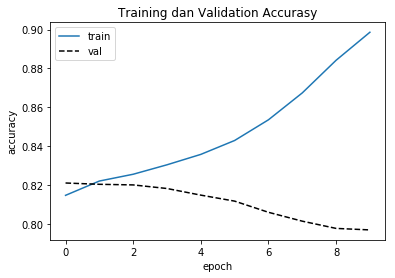

In [40]:
#grafik akurasi
plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'], linestyle='--', color = 'black')
plt.title('Training dan Validation Accurasy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

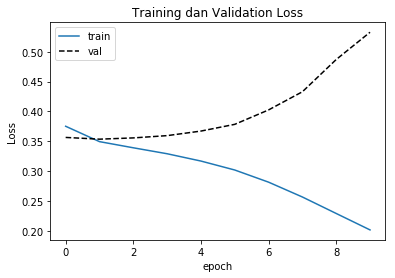

In [41]:
#grafik loss
plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'],linestyle='--', color = 'black')
plt.title('Training dan Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [85]:
predictions = model.predict(X_test)

[print(listdata[i], predictions[i], y_test[i]) for i in range(0, 5)]

Ga disappointed neat products .. Meletot Hilsnyaa Speed ​​of delivery is good. [0.02727566 0.03818621 0.06055716 0.39382625 0.10276756] [1 0 0 0 0]
Rdtanya replace broken glass, broken chargernya [1.274641e-04 2.250113e-02 3.756756e-01 7.249154e-01 4.153653e-02] [0 0 0 0 1]
Nyesel bngt dsni shopping antecedent photo message pictures gk according foto.di existing collagen super fit nyampe holo my house open ehhh collagen contents even in the face pdahal jg description super existing collagen originalnya.pas writing my check lg in photo captions already ma The change ma pictures that the face. [1.2669063e-04 2.8759649e-02 4.1430339e-01 9.2384607e-02 5.2568752e-01] [0 0 0 0 1]
Sent a light blue suit goods ga want a refund [0.00270839 0.00316588 0.54171443 0.4434515  0.05933532] [0 0 1 0 0]
Pendants came with dents and scratches on its surface. The coating looks like it will change colour quickly.  [3.8928520e-06 2.8114860e-05 2.6388578e-03 5.1312673e-01 6.1517018e-01] [0 0 0 0 1]


[None, None, None, None, None]

In [86]:
y_test

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

### tes model ke data baru (test)

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.svm import SVC
import pandas as pd
import pickle
from collections import Counter
from bs4 import BeautifulSoup as bs
import re,csv, os, itertools, pandas as pd,docx2txt
from tqdm import tqdm
from pattern.web import PDF
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from spacy.lang.id import Indonesian
from html import unescape
from unidecode import unidecode
from bz2 import BZ2File as bz2
from textblob import TextBlob
import spacy
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN # Combination of the 2
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import metrics
from imblearn.metrics import classification_report_imbalanced

In [127]:
def LoadStopWords(lang):
    L = lang.lower().strip()
    if L == 'en' or L == 'english' or L == 'inggris':
        lemmatizer = WordNetLemmatizer()
        stops =  set([t.strip() for t in LoadDocuments(file = 'C:/WinPython_64bit/notebooks/Google-Play-Store-Review-Extractor-master/stopwords_eng.txt')[0]])
    elif L == 'id' or L == 'indonesia' or L=='indonesian':
        lemmatizer = Indonesian() 
        stops = set([t.strip() for t in LoadDocuments(file = 'C:/WinPython_64bit/notebooks/Google-Play-Store-Review-Extractor-master/stopwords_id.txt')[0]])
    else:
        print('Warning, language not recognized. Empty StopWords Given')
        stops = set(); lemmatizer = None
    return stops, lemmatizer

def fixTags(T):
    getHashtags = re.compile(r"#(\w+)")
    pisahtags = re.compile(r'[A-Z][^A-Z]*')
    t = T
    tagS = re.findall(getHashtags, T)
    for tag in tagS:
        proper_words = ' '.join(re.findall(pisahtags, tag))
        t = t.replace('#'+tag,proper_words)
    return t

def readBz2(file):
    with bz2(file, "r") as bzData:
        txt = []
        for line in bzData:
            try:
                txt.append(line.strip().decode('utf-8','replace'))
            except:
                pass
    return ' '.join(txt)

def LoadDocuments(dPath=None,types=None, file = None): # types = ['pdf','doc','docx','txt','bz2']
    Files, Docs = [], []
    if types:
        for tipe in types:
            Files += crawlFiles(dPath,tipe)
    if file:
        Files = [file]
    if not types and not file: # get all files regardless of their extensions
        Files += crawlFiles(dPath)
    for f in Files:
        if f[-3:].lower()=='pdf':
            try:
                Docs.append(PDF(f).string)
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='txt' or f[-3:].lower()=='dic':
            try:
                df=open(f,"r",encoding="utf-8", errors='replace')
                Docs.append(df.readlines());df.close()
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='bz2':
            try:
                Docs.append(readBz2(f))
            except:
                print('error reading{0}'.format(f))
        elif f[-4:].lower()=='docx':
            try:
                Docs.append(docx2txt.process(f))
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='csv':
            Docs.append(pd.read_csv(f))
        else:
            print('Unsupported format {0}'.format(f))
    if file:
        Docs = Docs[0]
    return Docs, Files

def DelPic(text): #untuk menghilangkan informasi gambar
    D = text.split()
    D = [d for d in D if 'pic.twitter.com' not in d]
    return ' ' .join(D)

def LoadSlang(DirSlang):
    Slangs =LoadDocuments(file = DirSlang)
    SlangDict={}
    for slang in Slangs[0]:
        try:
            key, value = slang.split(':')
            SlangDict[key.strip()] = value.strip()
        except:
            pass
    return SlangDict

def cleanText(T, fix={}, lang = 'id', lemma=None, stops = set(), symbols_remove = False, min_charLen = 0): 
    # lang & stopS only 2 options : 'en' atau 'id'
    # symbols ASCII atau alnum
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    t = re.sub(pattern,' ',T) #remove urls if any
    t = DelPic(t)
    t = unescape(t) # html entities fix
    t = fixTags(t) # fix abcDef
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = sent_tokenize(t) # sentence segmentation. String to list
    for i, K in enumerate(t):
        if symbols_remove:
            K = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',K)
        
        cleanList = []
        if lang =='en':
            listKata = word_tokenize(K) # word tokenize
            for token in listKata:
                if token in fix.keys():
                    token = fix[token]
                if lemma:
                    token = lemma.lemmatize(token)
                if stops:
                    if len(token)>=min_charLen and token not in stops:
                        cleanList.append(token)
                else:
                    if len(token)>=min_charLen:
                        cleanList.append(token)
            t[i] = ' '.join(cleanList)
        else:
            if lemma:
                K = lemma(K)
                listKata = [token.text for token in K]
            else:
                listKata = TextBlob(K).words
                
            for token in listKata:
                if token in fix.keys():
                    token = fix[token]
                
                if lemma:
                    token = lemma(token)[0].lemma_
                if stops:    
                    if len(token)>=min_charLen and token not in stops:
                        cleanList.append(token)
                else:
                    if len(token)>=min_charLen:
                        cleanList.append(token)
            t[i] = ' '.join(cleanList)
    return ' '.join(t)

stops, lemmatizer = LoadStopWords(lang='en')
Slangs=LoadSlang('C:/WinPython_64bit/notebooks/Google-Play-Store-Review-Extractor-master/slang.txt')



def predict(text):
      ##Preprocessing
        text = cleanText(text,Slangs, lemma=lemmatizer,lang='en', stops = stops, symbols_remove = True, min_charLen =3)
        text = cleanText(text,fix={}, lemma=lemmatizer,lang='en', stops = stops, symbols_remove = True, min_charLen =3)

      ##Predict
        filename = 'weights4.hdf5'
        clf = pickle.load(open(filename, "rb"))
        label = clf.predict(test[0])
        return label[0]

In [95]:
datatest = pd.read_csv('C:/WinPython_64bit/notebooks/shopee code league 2020/shopee-sentiment-analysis_dataset/test - Copy.csv')
listdatatest=datatest['review']

In [104]:
print(listdatatest.index)

RangeIndex(start=0, stop=62918, step=1)


In [96]:
len(listdatatest)

62918

In [97]:
from tqdm import tqdm
for i in tqdm(range(len(datatest))):
    if pd.isna(datatest['review'][i]):
        datatest['review'][i] = predict(listdatatest[i])


100%|█████████████████████████████████████████████████████████████████████████| 62918/62918 [00:00<00:00, 65540.85it/s]

In [129]:
print(listdatatest[0])
print(predict(listdatatest[0]))

Dateng goods do not conform pesanan😔


UnpicklingError: invalid load key, 'H'.

In [81]:
predictions[2]

array([1.2669063e-04, 2.8759649e-02, 4.1430339e-01, 9.2384607e-02,
       5.2568752e-01], dtype=float32)